In [15]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B2 Principles - Zero shot & one shot - relevant dataframe

## Notebook to evaluate GPT-annotate results - HLS speeches for relevance

Codebooks:
- B2.0: zero shot
- B2.1: one shot
No evaluation of context
-
Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
FINGERPRINT USED: fp_43dfabdef1


In [16]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [17]:
HLS_train['PRINCIPLE'].value_counts()

not evaluated                  992
prioritarian                    66
utilitarian                     59
egalitarian                     52
general normative statement     34
sufficientarian                  8
libertarian                      1
Name: PRINCIPLE, dtype: int64

# 1. Results B2.0

In [18]:
#B1.0
path_B2 = 'STRING_RESULT/B2.0/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B2}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B2}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B2}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B2}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B2}/all_iterations_string_T0_7917.csv')

seeds_B2 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [19]:
# Evaluate missed batches
B2_missed = pd.read_csv('STRING_RESULT/B2.0/T0_missed_batches.csv')
B2_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B8
1,1,280 - I1 - B1
2,2,280 - I1 - B11


A lot more complete results - fingerprint more steady.

The fact that batches are missed must be taken into account when evaluating accuracy and performance.

> let op: laatste batch heeft minder zinnen

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column PRINCIPLE_x is the ground truth label - PRINCIPLE_y is the predicted label

Save as dataframes - if neccessary

In [20]:
print(classification_report(S1['PRINCIPLE_x'],S1['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.75      0.65      0.69        51
general normative statement       0.52      0.33      0.41        33
                libertarian       0.00      0.00      0.00         1
               prioritarian       0.79      0.79      0.79        66
            sufficientarian       0.40      0.50      0.44         8
                utilitarian       0.61      0.78      0.68        59

                   accuracy                           0.67       218
                  macro avg       0.51      0.51      0.50       218
               weighted avg       0.67      0.67      0.66       218



In [21]:
print(classification_report(S2['PRINCIPLE_x'],S2['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.70      0.63      0.67        49
general normative statement       0.57      0.41      0.48        29
                libertarian       0.00      0.00      0.00         1
               prioritarian       0.77      0.76      0.77        58
            sufficientarian       0.36      0.50      0.42         8
                utilitarian       0.65      0.77      0.71        53

                   accuracy                           0.67       198
                  macro avg       0.51      0.51      0.51       198
               weighted avg       0.67      0.67      0.67       198



In [22]:
print(classification_report(S3['PRINCIPLE_x'],S3['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.74      0.64      0.69        45
general normative statement       0.44      0.30      0.36        27
                libertarian       0.00      0.00      0.00         1
               prioritarian       0.82      0.74      0.78        54
            sufficientarian       0.44      0.67      0.53         6
                utilitarian       0.61      0.83      0.70        47

                   accuracy                           0.67       180
                  macro avg       0.51      0.53      0.51       180
               weighted avg       0.67      0.67      0.66       180



In [23]:
print(classification_report(S4['PRINCIPLE_x'],S4['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.76      0.63      0.69        51
general normative statement       0.48      0.45      0.47        33
                libertarian       0.00      0.00      0.00         1
               prioritarian       0.78      0.76      0.77        66
            sufficientarian       0.40      0.50      0.44         8
                utilitarian       0.64      0.76      0.70        59

                   accuracy                           0.67       218
                  macro avg       0.51      0.52      0.51       218
               weighted avg       0.68      0.67      0.67       218



In [24]:
print(classification_report(S5['PRINCIPLE_x'],S5['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.73      0.65      0.69        51
general normative statement       0.50      0.30      0.38        33
                libertarian       0.00      0.00      0.00         1
               prioritarian       0.78      0.76      0.77        66
            sufficientarian       0.40      0.50      0.44         8
                utilitarian       0.59      0.78      0.67        59

                   accuracy                           0.66       218
                  macro avg       0.50      0.50      0.49       218
               weighted avg       0.66      0.66      0.65       218



Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

In [25]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1, S2, S3, S4, S5]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.665749   0.665749  0.665749
egalitarian                  0.685510   0.738675  0.639733
general normative statement  0.417814   0.504711  0.360200
libertarian                  0.000000   0.000000  0.000000
macro avg                    0.504430   0.508723  0.513138
prioritarian                 0.773651   0.787727  0.760478
sufficientarian              0.457544   0.401616  0.533333
utilitarian                  0.692058   0.619607  0.785081
weighted avg                 0.661650   0.670194  0.665749

Standard Deviation of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.005680   0.005680  0.005680
egalitarian                  0.010908   0.021711  0.009090
general normative statement  0.054961   0.047182  0.070440

In [26]:
mean_df

,f1-score,precision,recall
index,,,
accuracy,0.665749,0.665749,0.665749
egalitarian,0.685510,0.738675,0.639733
general normative statement,0.417814,0.504711,0.360200
libertarian,0.000000,0.000000,0.000000
macro avg,0.504430,0.508723,0.513138
prioritarian,0.773651,0.787727,0.760478
sufficientarian,0.457544,0.401616,0.533333
utilitarian,0.692058,0.619607,0.785081
weighted avg,0.661650,0.670194,0.665749


## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed.

In [27]:
labels = ['egalitarian', 'general normative statement', 'libertarian','prioritarian', 'sufficientarian', 'utilitarian']

# Number of plots
num_plots = len(seeds_B1)
# Create plot names
plot_names = list(seeds_B1.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B1[name][0]  # Access the dataframe
    cm = confusion_matrix(df['PRINCIPLE_x'], df['PRINCIPLE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'seeds_B1' is not defined

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

# 2. Results B2.1 - one shot principles

In [28]:
#B2.1
path_B21 = 'STRING_RESULT/B2.1/all_iterations'

# Open all dataframes
S1_21 = pd.read_csv(f'{path_B21}/all_iterations_string_T0_3644.csv')
S2_21 = pd.read_csv(f'{path_B21}/all_iterations_string_T0_3441.csv')
S3_21 = pd.read_csv(f'{path_B21}/all_iterations_string_T0_280.csv')
S4_21 = pd.read_csv(f'{path_B21}/all_iterations_string_T0_5991.csv')
S5_21 = pd.read_csv(f'{path_B21}/all_iterations_string_T0_7917.csv')

seeds_B21 = {
    "S1": [S1_21],
    "S2": [S2_21],
    "S3": [S3_21],
    "S4": [S4_21],
    "S5": [S5_21]
}

### 2. Evaluate missed batches

In [29]:
# Evaluate missed batches
B21_missed = pd.read_csv('STRING_RESULT/B2.1/T0_missed_batches.csv')
B21_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B8
1,1,280 - I1 - B1
2,2,280 - I1 - B11
3,3,3644 - I1 - B3
4,4,3644 - I1 - B7
5,5,280 - I1 - B9
6,6,5991 - I1 - B5


> note evaluations

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [ ]:
print(classification_report(S1_21['PRINCIPLE_x'],S1_21['PRINCIPLE_y']))

In [ ]:
print(classification_report(S2_21['PRINCIPLE_x'],S2_21['PRINCIPLE_y']))

In [ ]:
print(classification_report(S3_21['PRINCIPLE_x'],S3_21['PRINCIPLE_y']))

In [ ]:
print(classification_report(S4_21['PRINCIPLE_x'],S4_21['PRINCIPLE_y']))

In [ ]:
print(classification_report(S5_21['PRINCIPLE_x'],S5_21['PRINCIPLE_y']))

In [ ]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1_21, S2_21, S3_21, S4_21, S5_21]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

## Confusionmatrix van B2.1

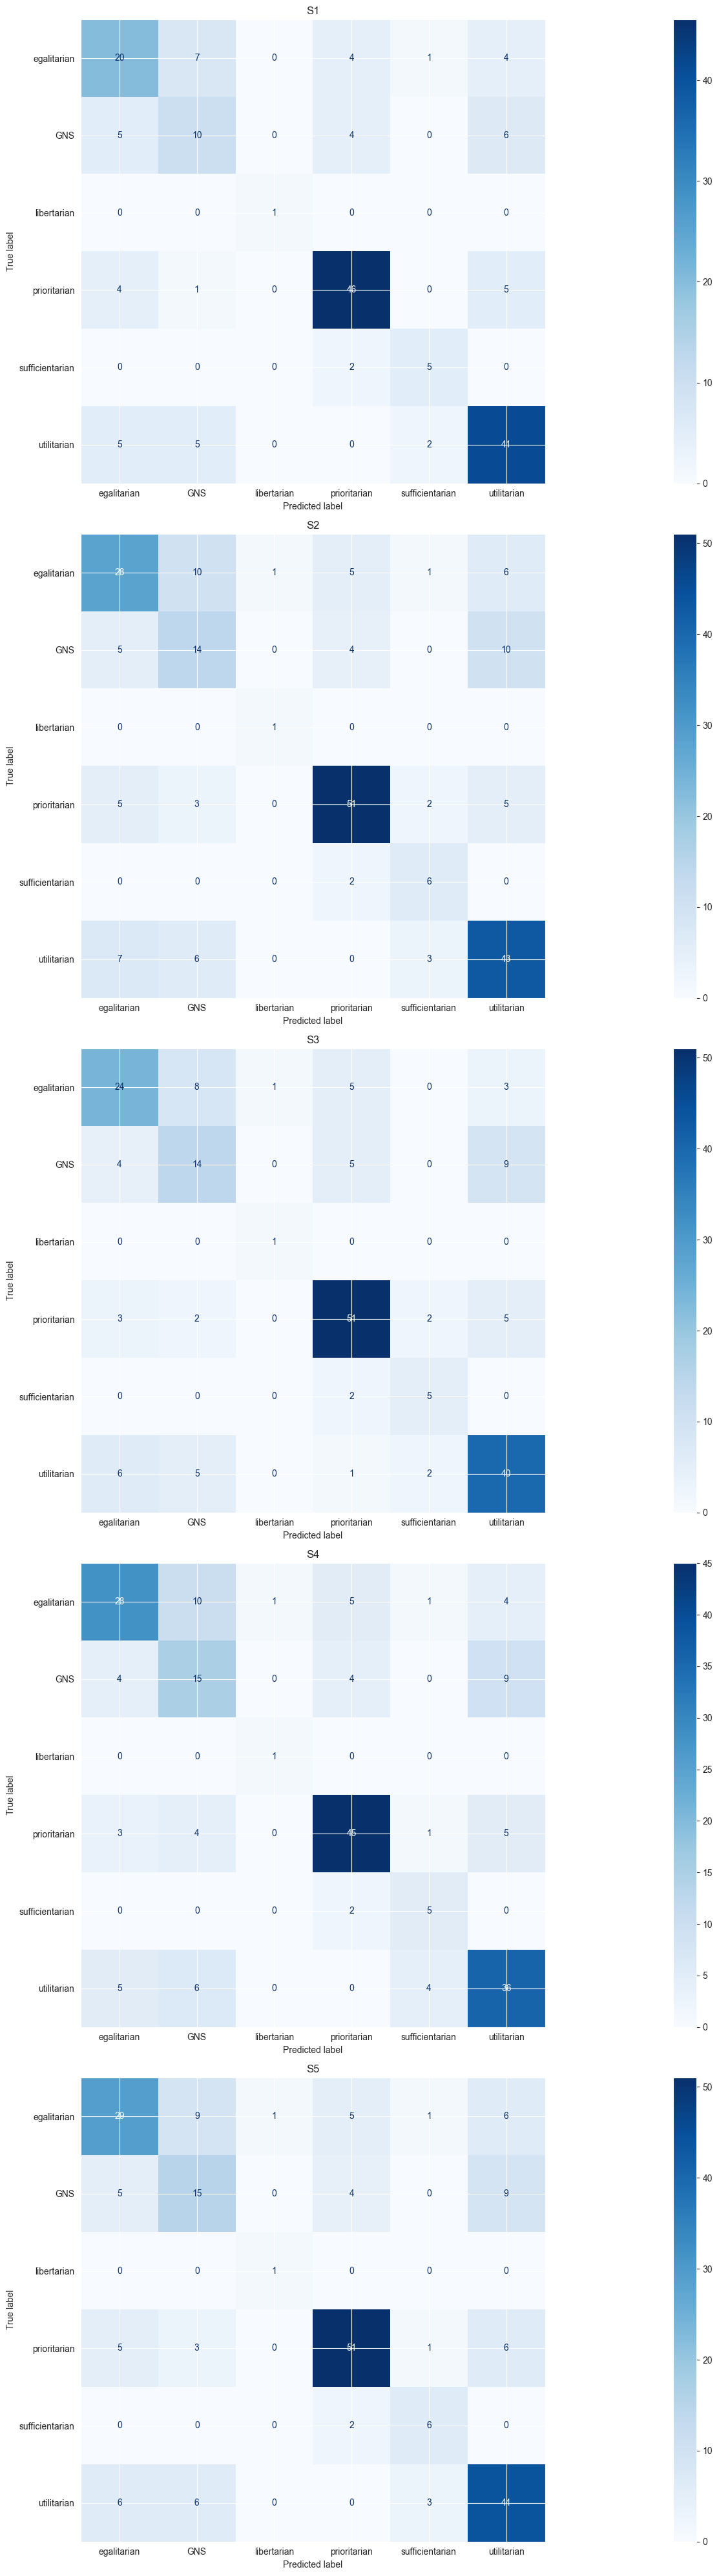

In [34]:
labels = ['egalitarian', 'GNS', 'libertarian','prioritarian', 'sufficientarian', 'utilitarian']

# Number of plots
num_plots = len(seeds_B21)
# Create plot names
plot_names = list(seeds_B21.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(40, 40))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B21[name][0]  # Access the dataframe
    cm = confusion_matrix(df['PRINCIPLE_x'], df['PRINCIPLE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## Evaluate inconsistencies over 5 seeds

In [14]:
# Test label and seed nr to all dataframes
B21 = [S1_21, S2_21, S3_21, S4_21, S5_21]

# Corresponding seed numbers
label =  ['S1 3644','S2 3441','S3 280', 'S4 5991', 'S5 7917']

# Adding the seed number column to each dataframe
for i, df in enumerate(B21):
    df['Seed'] = label[i]

NameError: name 'S1_21' is not defined

In [ ]:
B21_all = pd.concat([S1_21, S2_21, S3_21, S4_21, S5_21], axis=0, ignore_index=True)
B21_all_sorted = B21_all.sort_values('unique_id')
B21_all_sorted.shape

In [ ]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
# Define a function to check if all values in relevance_y are the same
def relevance_y_not_uniform(group):
    return group['PRINCIPLE_y'].nunique() != 1

# Group by 'ID' and filter groups
B21_consistency = B21_all_sorted.groupby('unique_id').filter(relevance_y_not_uniform)

print("\nFiltered DataFrame (where relevance_y is not the same for all rows within each unique ID):")
B21_consistency.head(100)

In [ ]:
# Count unique values in Unique_id column of B1 consistency to see how many sentences are inconsistently labelled
print('There are inconsistent labels given for', len(B21_consistency['unique_id'].unique()), 'sentences.')

In [ ]:
# eventueel nog controleren welke zinnen er dan precies fout zijn gegaan.

In [ ]:
# Evaluate texts that are labelled inconsistently and wrong
condition = B21_consistency['PRINCIPLE_x'] != B21_consistency['PRINCIPLE_y']

# Count the number of True values in the condition
B21_consistency_incorrect = B21_consistency[condition]
B21_consistency_incorrect